# Openfoodfacts : analyse exploratoire des données

In [1]:
%matplotlib inline

import os
import zipfile
import urllib

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd
from pandas.plotting import scatter_matrix

FOOD_PATH = os.path.join("datasets", "openfoodfacts")
FOOD_TRANSFORMED_PATH_FILE = os.path.join(FOOD_PATH, "fr.openfoodfacts.org.products_transformed.csv")

import seaborn as sns
sns.set()

pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_rows",1000)


# Import des données

In [2]:
import pandas as pd

def load_food_data(csv_path=FOOD_TRANSFORMED_PATH_FILE):
    return pd.read_csv(csv_path, sep=',', header=0, encoding='utf-8', low_memory=False)



In [3]:
food = load_food_data()

In [4]:
food.head()

,code,last_modified_t,product_name,states_tags,main_category_fr,brands,brands_tags,nutrition_grade_fr,energy_100g,sugars_100g,salt_100g,saturated-fat_100g,fiber_100g,proteins_100g,ingredients_from_palm_oil_n,pnns_groups_2,pnns_groups_1,labels_tags,countries_tags,additives_tags,additives_n,ingredients_text,image_url,nutrition_scoring,no_ingredients,no_ingredients_scoring,additives_nocive_scoring,energy_100g_scoring,salt_100g_scoring,sugars_100g_scoring,saturated-fat_100g_scoring,fiber_100g_scoring,proteins_100g_scoring,bio_scoring
0,0000000003087,1474103893,Farine de blé noir,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000024600,1434535914,Filet de bœuf,"en:to-be-completed,en:nutrition-facts-to-be-co...",Filet-de-boeuf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,en:france,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000027205,1458238638,NaN,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000036252,1489055667,Lion Peanut x2,"en:to-be-completed,en:nutrition-facts-complete...",NaN,Sunridge,sunridge,e,1883.0,57.5,0.09652,12.5,2.5,2.5,0.0,unknown,unknown,NaN,"en:france,en:united-states",en:e322,1.0,"Milk chocolate coating (evaporated cane juice,...",http://fr.openfoodfacts.org/images/products/00...,1.0,10.0,2.0,5.0,1.0,5.0,1.0,1.0,2.0,1.0,NaN
4,0000000039259,1473538082,Twix x2,"en:to-be-completed,en:nutrition-facts-to-be-co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,NaN,en:france,NaN,NaN,NaN,http://fr.openfoodfacts.org/images/products/00...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFE5176108>,
      dtype=object)

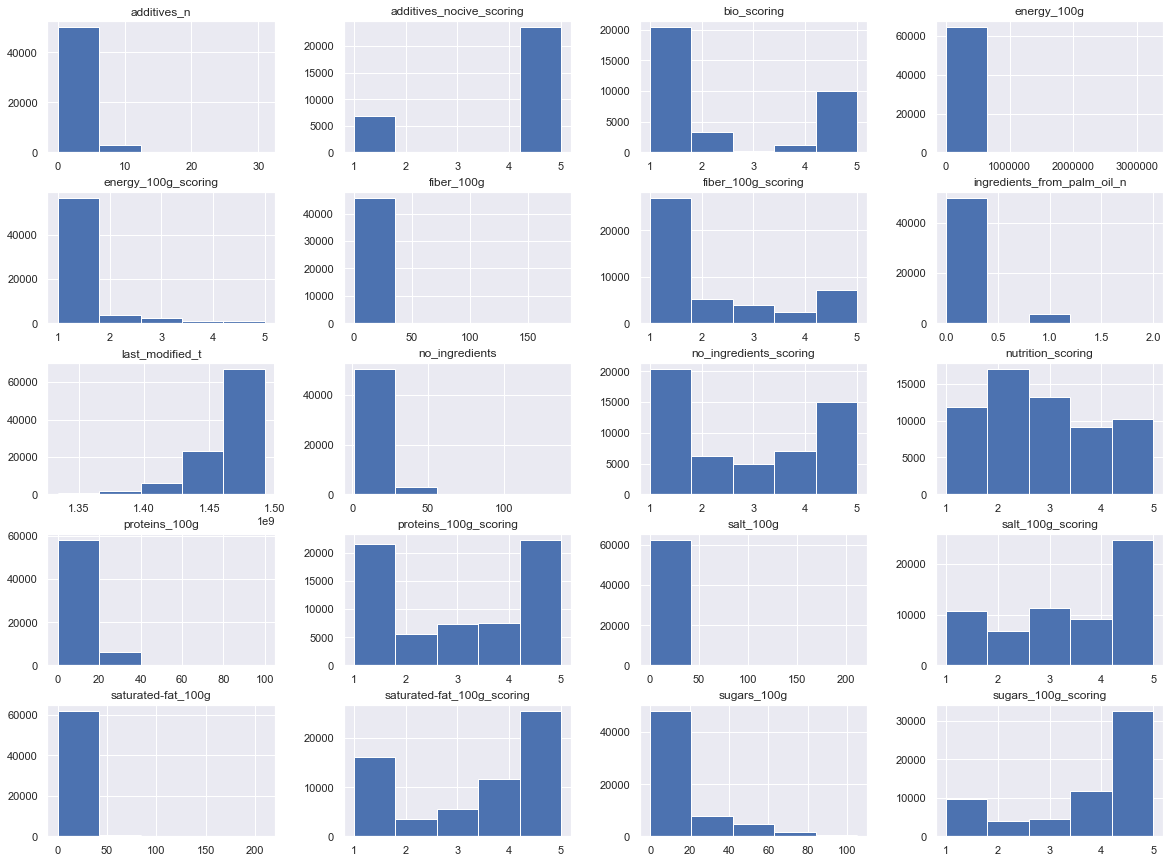

In [5]:
food.hist(bins=5, figsize=(20,15))

In [6]:
corr_matrix = food.corr()

In [7]:
corr_matrix['bio_scoring'].sort_values(ascending=False)

bio_scoring                    1.000000
salt_100g_scoring              0.207577
last_modified_t                0.203922
fiber_100g_scoring             0.170695
no_ingredients_scoring         0.165324
fiber_100g                     0.155727
nutrition_scoring              0.123408
additives_nocive_scoring       0.112090
saturated-fat_100g_scoring     0.079399
sugars_100g                    0.049733
energy_100g_scoring            0.003027
energy_100g                   -0.001230
saturated-fat_100g            -0.015898
proteins_100g_scoring         -0.026112
salt_100g                     -0.032090
proteins_100g                 -0.048194
ingredients_from_palm_oil_n   -0.050417
sugars_100g_scoring           -0.054466
no_ingredients                -0.169580
additives_n                   -0.255425
Name: bio_scoring, dtype: float64

In [8]:
food.columns

Index(['code', 'last_modified_t', 'product_name', 'states_tags',
       'main_category_fr', 'brands', 'brands_tags', 'nutrition_grade_fr',
       'energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
       'fiber_100g', 'proteins_100g', 'ingredients_from_palm_oil_n',
       'pnns_groups_2', 'pnns_groups_1', 'labels_tags', 'countries_tags',
       'additives_tags', 'additives_n', 'ingredients_text', 'image_url',
       'nutrition_scoring', 'no_ingredients', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFE5174CC8>,
      dtype=object)

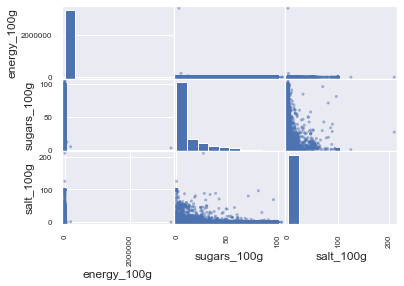

In [9]:
attributes_to_analyze = ['energy_100g', 'sugars_100g', 'salt_100g']

#attributes_to_analyze = ['energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
#       'fiber_100g', 'proteins_100g']
scatter_matrix(food[attributes_to_analyze])

# Réduction dimensionnelle

In [11]:
food.columns


[      'energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
       'fiber_100g', 'proteins_100g', 'ingredients_from_palm_oil_n',
       'pnns_groups_2', 'pnns_groups_1', 'labels_tags', 'countries_tags',
       'additives_tags', 'additives_n', 'ingredients_text', 'image_url',
       'nutrition_scoring', 'no_ingredients', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']


[      'nutrition_scoring', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']

Index(['code', 'last_modified_t', 'product_name', 'states_tags',
       'main_category_fr', 'brands', 'brands_tags', 'nutrition_grade_fr',
       'energy_100g', 'sugars_100g', 'salt_100g', 'saturated-fat_100g',
       'fiber_100g', 'proteins_100g', 'ingredients_from_palm_oil_n',
       'pnns_groups_2', 'pnns_groups_1', 'labels_tags', 'countries_tags',
       'additives_tags', 'additives_n', 'ingredients_text', 'image_url',
       'nutrition_scoring', 'no_ingredients', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring'],
      dtype='object')

In [13]:
# Import `PCA` from `sklearn.decomposition`
from sklearn.decomposition import PCA

# Build the model
pca = PCA(n_components=2)

# Reduce the data, output is ndarray
reduced_data = pca.fit_transform(food[[      'nutrition_scoring', 'no_ingredients_scoring',
       'additives_nocive_scoring', 'energy_100g_scoring', 'salt_100g_scoring',
       'sugars_100g_scoring', 'saturated-fat_100g_scoring',
       'fiber_100g_scoring', 'proteins_100g_scoring', 'bio_scoring']].notnull())

# Inspect shape of the `reduced_data`
reduced_data.shape

# print out the reduced data
print(reduced_data)

[[ 1.76157732 -0.27061757]
 [ 1.76157732 -0.27061757]
 [ 1.76157732 -0.27061757]
 ...
 [ 1.76157732 -0.27061757]
 [ 1.58900712  0.39424241]
 [ 1.76157732 -0.27061757]]


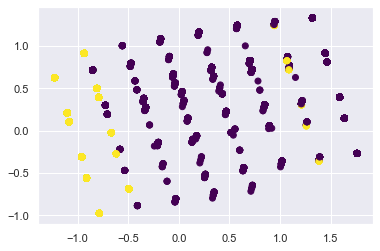

In [18]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=food['nutrition_scoring'].notnull(), cmap = 'viridis')

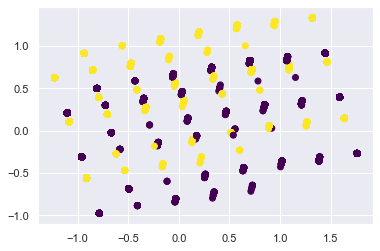

In [19]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=food['bio_scoring'].notnull(), cmap = 'viridis')

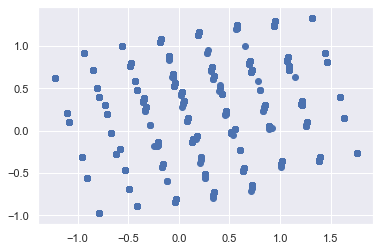

In [15]:
plt.scatter(reduced_data[:,0], reduced_data[:,1], cmap = 'viridis')